In [1]:
from matplotlib import pyplot
import numpy 
from numpy import sqrt, cos, sin, pi

import electrostatics
from electrostatics import PointCharge, ElectricField, GaussianCircle
from electrostatics import finalize_plot

def plotingfield(field,charges,XMIN,XMAX,YMIN,YMAX,ZOOM,XOFFSET):
    x, y = numpy.meshgrid(numpy.linspace(XMIN/ZOOM+XOFFSET, XMAX/ZOOM+XOFFSET, 15),
                          numpy.linspace(YMIN/ZOOM, YMAX/ZOOM, 15))
    u, v = numpy.zeros_like(x), numpy.zeros_like(y)
    n, m = x.shape
    for i in range(n):
        for j in range(m):
            if any(numpy.isclose(electrostatics.norm(charge.x-[x[i, j], y[i, j]]),
                                 0) for charge in charges):
                u[i, j] = v[i, j] = None
            else:
                mag = field.magnitude([x[i, j], y[i, j]])**(1/5)
                a = field.angle([x[i, j], y[i, j]])
                u[i, j], v[i, j] = mag*numpy.cos(a), mag*numpy.sin(a)
    
    cmap = pyplot.cm.get_cmap('plasma')
    pyplot.quiver(x, y, u, v, pivot='mid', cmap=cmap, scale=25)
    for charge in charges:
        charge.plot()
    
    finalize_plot()
#fig.savefig('dipole-field-vectors.pdf', transparent=True)

    


# Electric Field

The electric field, $\mathbf{E}$, at a given point is defined as the Force (vector), $\mathbf{F}$ that would be exerted on a stationary test particle of unit charge, $q_t$.
$$
\mathbf{F} = q_t\cdot\mathbf{E}
$$
or
$$
\mathbf{E} = \frac{\mathbf{F}}{q_t}.
$$
The units of the electric field are N/C (Newton/Coulomb).

The very presence of a charge, $q$, effects the space sounding it.  Part of this effect is the electric field.

For a point charge, $q$, we define the electric field at point, $P$, a distance $r$ from the charge as,

$$
\displaystyle\mathbf{E} = \frac{1}{4\pi\epsilon_0}\frac{q}{r}\hat{\mathbf{r}},
$$

where $\hat{\mathbf{r}}$ is the unit vector pointing from $q$ to $P$, and $\epsilon_0 = 8.85\times 10^{-12}$. 

Note that the electric field for a positive charge, $q$, always points radially away from the charge.  If $q < 0$ then the electric field points radially towards the charge.  The electric field for a positive, $q = 1.0 \times 10^{-8}$ C, and a negative, $q = -1.0 \times 10^{-8}$ C, charge are shown separately below below.  Each charge is centred at the origin.

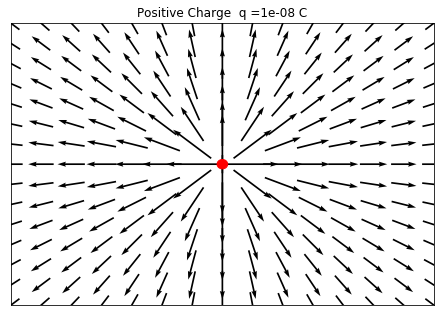

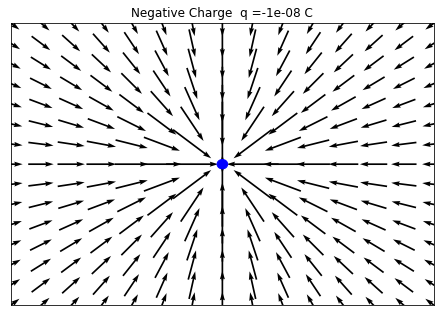

In [2]:

XMIN, XMAX = -4, 4
YMIN, YMAX = -3, 3
ZOOM = 1
XOFFSET = 0

electrostatics.init(XMIN, XMAX, YMIN, YMAX, ZOOM, XOFFSET)

chargepos = [PointCharge(1.0e-8,[0,0])]#,PointCharge(1.0E-8,[1,0])]

field1 = ElectricField(chargepos)
gpos = GaussianCircle(chargepos[0].x,.05)

pyplot.title("Positive Charge  q ="+str(chargepos[0].q) + " C")
plotingfield(field1,chargepos,XMIN,XMAX,YMIN,YMAX,ZOOM,XOFFSET)    
pyplot.show()

chargeneg = [PointCharge(-1.0e-8,[0,0])]#,PointCharge(1.0E-8,[1,0])]

field2 = ElectricField(chargeneg)
gneg = GaussianCircle(chargeneg[0].x,.05)


pyplot.title("Negative Charge  q ="+str(chargeneg[0].q) + " C")
plotingfield(field2,chargeneg,XMIN,XMAX,YMIN,YMAX,ZOOM,XOFFSET)   

pyplot.show()


We can take advantage of some of the packages in the electrostatic libraries to calculate electric fields.  See the examples below for help.

In [3]:

#create a point charge of 3 nC at the point (1,2)#

q0 = [PointCharge(3e-9,[1.0,2.0])]

#generate the electric field for q0
E0 = ElectricField(q0)

#calculate the field at the origin (0,0)
e0 = E0.vector([0.0,0.0])

#calculate the magnitude of the field at the orgin
me0 = E0.magnitude([0.0,0.0])

#display result
print("The electric field at ", [0,0], "is",e0,"C")
print("The magnitude of the field at ",[0,0], "is ", me0, "C")



The electric field at  [0, 0] is [-2.41275438 -4.82550877] C
The magnitude of the field at  [0, 0] is  5.39508281667 C


The Electric Field obeys the superposition principle.  That is, if we have two point charges, $q_1$ and $q_2$, each of which creates and electric field, $\mathbf{E_1}$ and $\mathbf{E_2}$, respectively.  The the net electric field is  

$$
\mathbf{E} = \mathbf{E}_1 + \mathbf{E}_2.
$$

To generalize, for a $n+1$ point charges $q_0, q_1, \dots, q_n$, the net electric field is

$$
\mathbf{E} = \sum_{i=0}^n \mathbf{E}_i,
$$

where $\mathbf{E}_i$ is the electric field for charge $q_i$.

## Exercise 1

There is a 5 nC charge at the point (x,y) = (0,3) and a -5 nC charge at the origin. 

(a) Find the electric field at the point x=4 on the x-axis.


(b) If a -3 nC charge is place on the x-axis at x=4, what is the electric force on the  -3 nC charge? (use your result from part a) (compare your result to the result you obtained on page 15 in the activity manual)


In [4]:
#answer to part a

thecharges = [PointCharge(5.0e-9,[0.0,3.0]),PointCharge(-5.0e-9,[0.0,0.0])]

thefield = ElectricField(thecharges)

print("The answer to part a, E=",thefield.vector([4.0,0.0]),"C")

#To get part b

#calculate the force using F = qE

F = (-3e-9)*thefield.vector([4.0,0.0])

print("\nThe force on a -3nC charge at (4,0) is",F,"N")

The answer to part a, E= [-1.37125022 -1.07901656] C

The force on a -3nC charge at (4,0) is [  4.11375065e-09   3.23704969e-09] N


# Electric Field Lines

A more useful means of visuallizing the electric field is with the use of electric field lines.  Instead of drawing many many vectors to represent the field everywhere, we can draw a pattern of several lines to represent what the field is doing.  These lines are called **electric field lines**.

### Rules for drawing Electric Field lines

1. Field lines are lines with direction.  **NOT VECTORS**!
+ Field lines originate at positive charges or at infinity
+ Field lines terminate at a negative charge or at infinity
+ The electric field, $\mathbf{E}$, at a point is tangent to the field line going through that given point.
+ The number of field lines is proportional to the magnitude of the charge.
+ Field lines **never** cross

Below are the electric field lines for positive and negative charges.

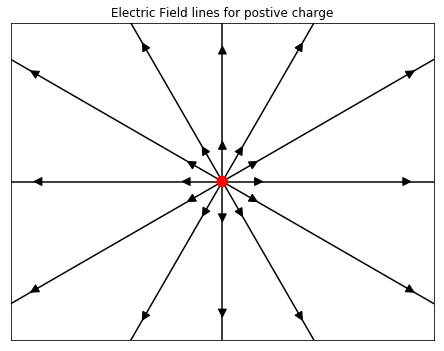

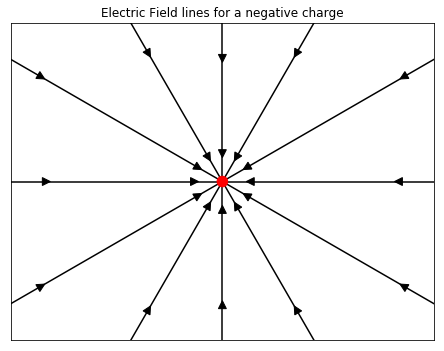

In [5]:
fieldlines = []
for x in gpos.fluxpoints(field1, 12):
    fieldlines.append(field1.line(x))
#fieldlines.append(field1.line([0, -10]))

fig = pyplot.figure(1,figsize=(6, 4.5))
field1.plot()
for fieldline in fieldlines:
    fieldline.plot()
for charge in chargepos:
    charge.plot()
pyplot.title("Electric Field lines for postive charge")
finalize_plot()
pyplot.show()

fieldlines = []
for x in gneg.fluxpoints(field2, 12):
    fieldlines.append(field2.line(x))
#fieldlines.append(field1.line([0, -10]))

fig = pyplot.figure(1,figsize=(6, 4.5))
field1.plot()
for fieldline in fieldlines:
    fieldline.plot()
for charge in chargepos:
    charge.plot()
pyplot.title("Electric Field lines for a negative charge")
finalize_plot()
pyplot.show()


# Electric Dipole

An electric dipole is a separation of positive and negative charges. The simplest example of this is a pair of electric charges of equal magnitude but opposite sign, separated by some distance.  Below is an example of the electric field for a dipole with two equal but opposite charges.  The green vector, $\mathbf{p}$, is called the electric dipole moment.  The electric dipole moment points from the negative charge to the positive charge and its magnitude is

$$
p = q d,
$$

where $d$ is the distance separating the charges and $q$ is the magnitude of each of the charges.

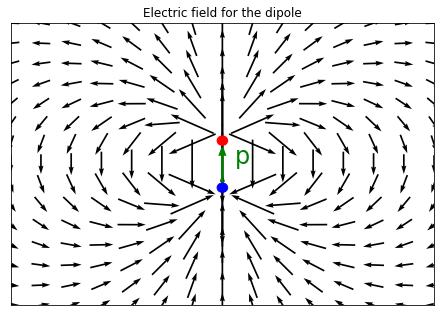

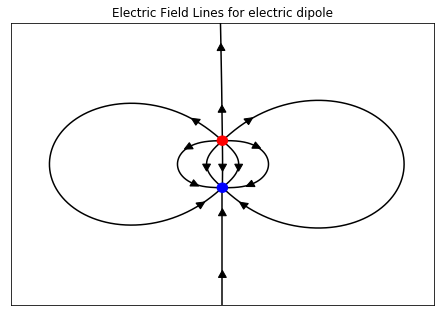

In [13]:

XMIN, XMAX = -4, 4
YMIN, YMAX = -3, 3
ZOOM = 1
XOFFSET = 0

electrostatics.init(XMIN, XMAX, YMIN, YMAX, ZOOM, XOFFSET)

charges = [PointCharge(-1.0e-8,[0,-.5]),PointCharge(1.0E-8,[0,0.5])]

fielddipole = ElectricField(charges)
g = GaussianCircle(charges[0].x,.05)


plotingfield(fielddipole,charges,XMIN,XMAX,YMIN,YMAX,ZOOM,XOFFSET)    
hg = charges[0].E([.5,0])
hg2 = charges[1].E([.5,0])
gg = fielddipole.vector([.5,0])
#print(hg.T)
#print(hg2.T)
#print(gg.T)
pyplot.arrow(0,-.5,0,.7,color='g',linewidth=2,head_width=.1)
pyplot.title("Electric field for the dipole")
pyplot.text(.24,0,"p",color='g',fontsize=24)
#pyplot.show()

#def onz(field,z):
#    return field.magnitude([0,z])
    
#pyplot.gcf().clear()
#z = numpy.linspace(10,50,100)
#eonz=[onz(fielddipole,zz) for zz in z]

#def aonz(z):
#    return 2.0*1.0/(4.0*pi*8.85e-12)*1.0e-8/z**3
#error = [numpy.abs(aonz(zz)-onz(fielddipole,zz))/onz(fielddipole,zz) for zz in z]

#pyplot.plot(z,error)
#pyplot.plot(z,approx)
#pyplot.show()



# Create the field lines
g = GaussianCircle(charges[1].x, 0.1)

# Create the field lines
fieldlines = []
for x in g.fluxpoints(fielddipole, 8):
    fieldlines.append(fielddipole.line(x))
fieldlines.append(fielddipole.line([0, -3.0]))
pyplot.show()

#fig = pyplot.figure(figsize=(6, 4.5))
pyplot.title("Electric Field Lines for electric dipole")
fielddipole.plot()
for fieldline in fieldlines:
    fieldline.plot()
for charge in charges:
    charge.plot()
finalize_plot()
pyplot.show()




## Exercise 2

Consider a dipole centered at the orgin with a charge $q$ separated by a distance $d$ on the $z$-axis.

1. Derive an expression for the electric field at a point $z > d$ on the $z$-axis.

+ Simplify your previous expression for $z >> d$. (do not take the limit $z\rightarrow \infty$)

+ Using the methods described above plot the relative error between the exact magnitude of the field and the approximated magnitude in the previous question. ($q=1.0\times 10^{-8}$ C, $d = 0.5$ m)
+ How much bigger does $z$ need to be compared to $d$ so that the approximate solution is within 0.5% of the exact solution?

## Exercise 3

For the dipole describe in exercise 2

1. Derive an expression for the electric field at a point $x$ on the $x$-axis.
+ Simplify your previous expression for $x>>d$